# Personal-TechTest
* This notebook was created for personal project.
* I'll use "O&G Equipment Data.xlsx" file sended by Shape to create a model that will can predict failures on FPSO equipaments.

### My workflow

- Problem definition
- Data dict
- Features / Evaluation / Data Exploration / Data Visualization
- Modelling / Experimentation
- Conclusion

### 1. Problem definition
The objective of this study is evaluate the equipment data, which were obtained through sensors in the FPSO. Through sensor data, in 2 different configurations over time, we will create a model to predict possible failures. ( binary classification )

#### Quotes:
* 1 – Calculate how many times the equipment has failed
* 2 – Categorize equipment failures by setups configurations (preset 1 and preset 2)
* 3 – Categorize equipment failures by their nature/root cause according to parameter readings (temperature, pressure, and others)
* 4 – Create a model using the technique you think is most appropriate and measure its performance
* 5 – Analyze variable importance

### 2. Data dict
-- Extracted of "O&G Equipment Data.xlsx" file sended by Shape.
* Cycles: Over the time
* Preset: Configuration number (can be preset 1 or preset 2)
* Temperature: Temperature of the equipament.
* Pressure: Pressure that the equipment is subjected
* VibrationX: Vibration on axis X
* VibrationY: Vibration on axis Y
* VibrationZ: Vibration on axis Z
* Frequency: Frequency of Vibrations
* Fail: If an equipament failed or not.

###### Saving data dict as python dict that can be consulted in the future

In [1]:
data_dict = {
    "Cycles": "Over the time",
    "Preset": "Configuration number (can be preset 1 or preset 2)",
    "Temperature": "Temperature of the equipament.",
    "Pressure": "Pressure that the equipment is subjected",
    "VibrationX": "Vibration on axis X",
    "VibrationY": "Vibration on axis Y",
    "VibrationZ": "Vibration on axis Z",
    "Frequency": "Frequency of Vibrations",
    "Fail": "If an equipament failed or not."
}
data_dict

{'Cycles': 'Over the time',
 'Preset': 'Configuration number (can be preset 1 or preset 2)',
 'Temperature': 'Temperature of the equipament.',
 'Pressure': 'Pressure that the equipment is subjected',
 'VibrationX': 'Vibration on axis X',
 'VibrationY': 'Vibration on axis Y',
 'VibrationZ': 'Vibration on axis Z',
 'Frequency': 'Frequency of Vibrations',
 'Fail': 'If an equipament failed or not.'}

### 3. Features / Evaluation / Data Exploration / Data Visualization

##### Preparing libraries that I'll use
I will use pandas, numpy & matplotlib for data analysis and manipulations.

In [2]:
# Import all libraries such as regular EDA (exploratory data analysis) and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# I want the plots to appear inside the notebook
%matplotlib inline 

# Estimators from scikit-learn (in order according scikit-learn map for choosing model)
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression # is regression model but can be used as classifier in some cases.
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve # scores for classification problems
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# export model
import pickle

### Loading data

In [3]:
df = pd.read_excel("./O&G Equipment Data.xlsx")
df.head()

,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail
0,1,3,6,44.235186,47.657254,46.441769,64.820327,66.454520,44.483250,False
1,2,2,4,60.807234,63.172076,62.005951,80.714431,81.246405,60.228715,False
2,3,2,1,79.027536,83.032190,82.642110,98.254386,98.785196,80.993479,False
3,4,2,3,79.716242,100.508634,122.362321,121.363429,118.652538,80.315567,False
4,5,2,5,39.989054,51.764833,42.514302,61.037910,50.716469,64.245166,False


## Data exploration

In [4]:
df.shape

(800, 10)

In [5]:
# checking if have some null cells on data
df.isna().sum()

Cycle          0
Preset_1       0
Preset_2       0
Temperature    0
Pressure       0
VibrationX     0
VibrationY     0
VibrationZ     0
Frequency      0
Fail           0
dtype: int64

In [6]:
# Checking how many times the equipament has failed ( Question 1)
df["Fail"].value_counts()

False    734
True      66
Name: Fail, dtype: int64

The equipament has failed in 66 oportunities

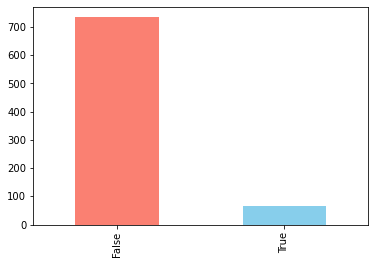

In [7]:
# more visual
df["Fail"].value_counts().plot(kind="bar", color=["salmon", "skyblue"]);

Unbalanced problem.

In [8]:
df.describe()

,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,1.988750,4.551250,69.263494,78.997945,73.860275,72.786878,71.866211,68.223449
std,231.0844,0.805875,2.293239,25.536252,32.501834,31.229631,32.739745,27.844616,29.138702
min,1.0000,1.000000,1.000000,2.089354,3.480279,3.846343,10.057744,18.784169,4.380101
25%,200.7500,1.000000,3.000000,51.040134,55.508564,50.752461,48.523982,50.787638,45.861762
50%,400.5000,2.000000,5.000000,65.906716,75.014848,69.394953,65.504770,69.319237,65.664252
75%,600.2500,3.000000,7.000000,80.527220,99.302530,90.195059,94.075572,88.891205,90.097457
max,800.0000,3.000000,8.000000,255.607829,189.995681,230.861142,193.569947,230.951134,178.090303


### Categorizing the fails according preset setups

In [9]:
preset1_fails = pd.crosstab(df.Fail, df.Preset_1)
preset1_fails

Preset_1,1,2,3
Fail,,,
False,237,260,237
True,27,21,18


In [10]:
preset2_fails = pd.crosstab(df.Fail, df.Preset_2)
preset2_fails

Preset_2,1,2,3,4,5,6,7,8
Fail,,,,,,,,
False,84,92,95,90,88,92,100,93
True,11,9,6,3,12,9,9,7


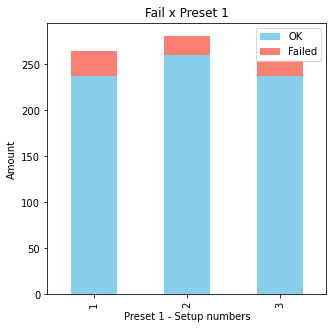

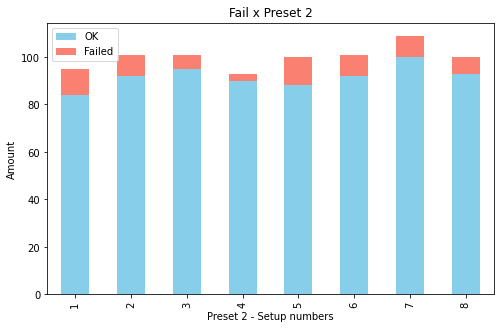

In [11]:
# Turn on more visual
pd.crosstab(df.Preset_1, df.Fail).plot(kind="bar",
                                   figsize=(5,5),
                                   color=["skyblue", "salmon"], stacked=True)
plt.title("Fail x Preset 1")
plt.xlabel("Preset 1 - Setup numbers")
plt.ylabel("Amount")
plt.legend(["OK", "Failed"]);

pd.crosstab(df.Preset_2, df.Fail).plot(kind="bar",
                                   figsize=(8,5),
                                   color=["skyblue", "salmon"], stacked=True)
plt.title("Fail x Preset 2")
plt.xlabel("Preset 2 - Setup numbers")
plt.ylabel("Amount")
plt.legend(["OK", "Failed"]);

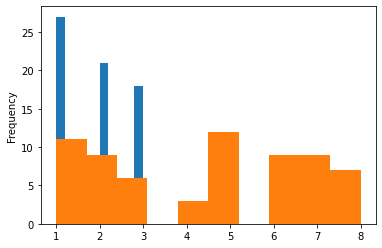

In [12]:
# analysing when the fail occur at preset 1 and 2
df.Preset_1[df.Fail == True].plot(kind="hist");
df.Preset_2[df.Fail == True].plot(kind="hist");

### Analysing frequency

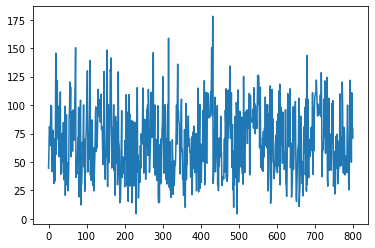

In [109]:
# plotting frequency to observe
plt.plot(df.Frequency);

### Analysing features with Correlation Matrix

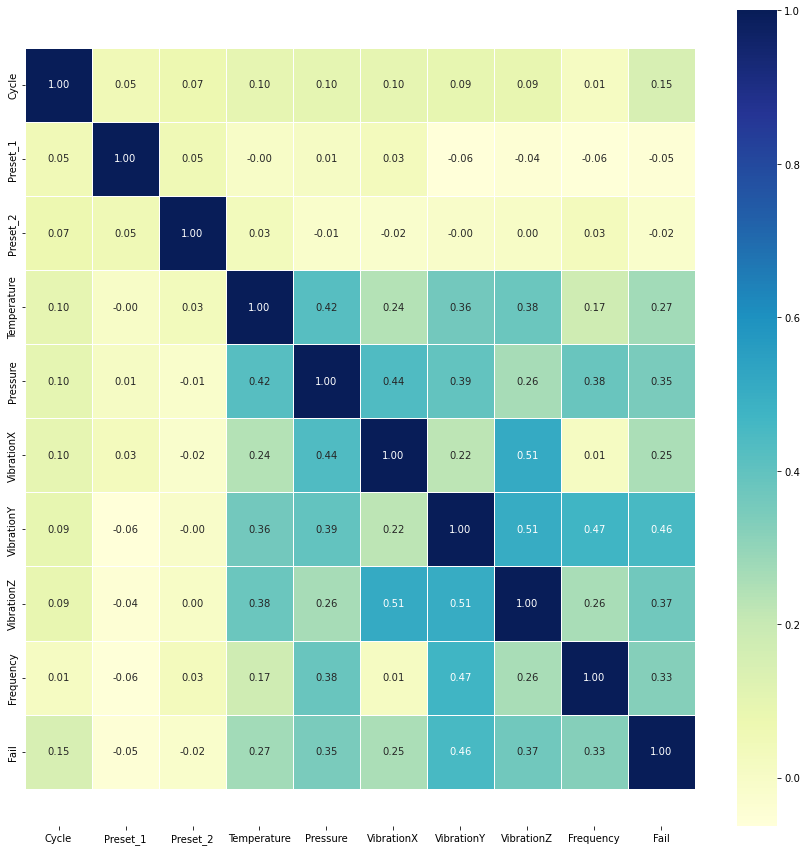

In [13]:
# Making a correlation matrix to get insights about data, visualyzing how the features are correlated. 
corr_matrix = df.corr()

fig, ax =plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

We can see in this matrix that the vibration on Y axis has more correlation with the fail, frequency and vibration on Z axis of equipament, compared to other vibrations (Z and X).

The vibration on Z axis has a good correlation with vibration on X and Y (> 0.5). But the vibration on X dont have the same level of correlation with Y axis (only 0.22).

As we can see, the preset apparently don't have some importance.

In [14]:
# Reducing the numbers of features to improve model performance, using only helpful features
df_filtered = df.drop(["Preset_1", "Preset_2"], axis=1)
df_filtered.head()

,Cycle,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail
0,1,44.235186,47.657254,46.441769,64.820327,66.454520,44.483250,False
1,2,60.807234,63.172076,62.005951,80.714431,81.246405,60.228715,False
2,3,79.027536,83.032190,82.642110,98.254386,98.785196,80.993479,False
3,4,79.716242,100.508634,122.362321,121.363429,118.652538,80.315567,False
4,5,39.989054,51.764833,42.514302,61.037910,50.716469,64.245166,False


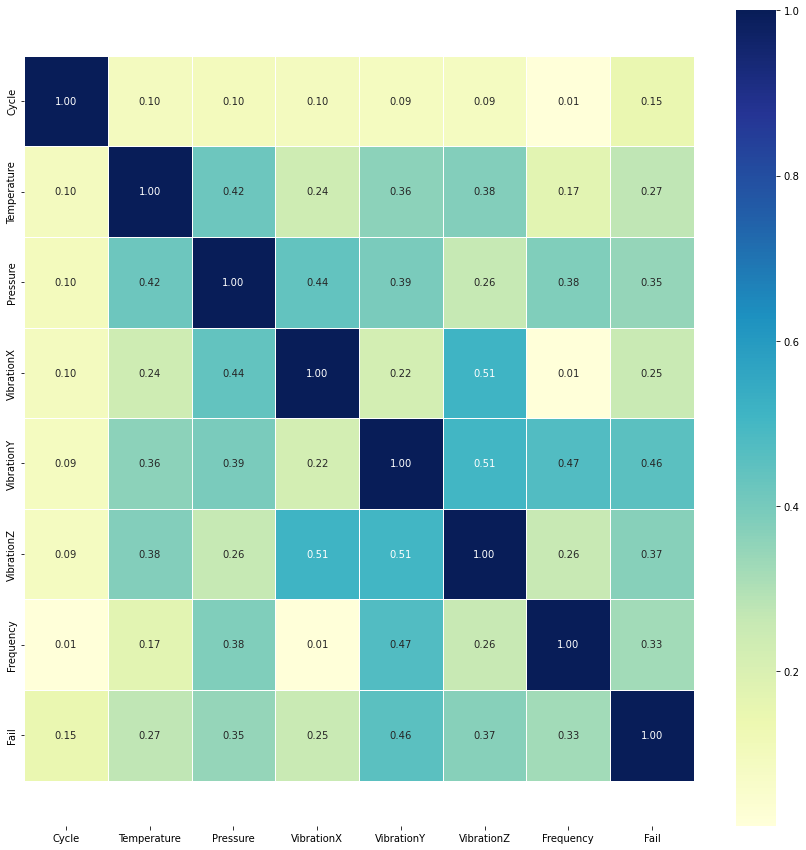

In [15]:
# making the correlation matrix again, this time without preset 1 and 2
corr_matrix_filtered = df_filtered.corr()

fig, ax =plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr_matrix_filtered,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

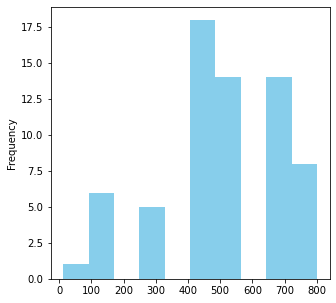

In [16]:
# evalute with more visual data, if the failures can be relationated with the cycles
df.Cycle[df.Fail == True].plot(kind="hist",color = 'skyblue');
plt.gcf().set_size_inches(5, 5)

### 4. Modelling / Experimentation

In [17]:
# split data into X and y
X = df_filtered.drop("Fail", axis=1)
y = df_filtered["Fail"]

# train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
# normally, I use 20% of dataset to test, but in this case, we see that the problem is unbalanced and we have  low amounts of samples.

y_test.value_counts()

False    298
True      22
Name: Fail, dtype: int64

Choosing the right estimator on: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

I'll create a dict with all models that I want to test.

In [18]:
models = {
    "LinearSVC": svm.SVC(kernel="linear", probability=True),
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [20]:
# create a function to fit and score estimators
def fit_and_score (models, X_train, X_test, y_train, y_test):
    """
        This function fit and evaluate the models that I put in.
        models = a dict of different models for ML.
        X_train = set of X to train
        X_test = set of X for test
        y_train = set of y to train
        y_test = set of y for test
    """
    
    # set random seed
    np.random.seed(42)
    
    # Make a dict of score
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        
        # fit the model
        model.fit(X_train, y_train)
        
        #Evaluata the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
        # take preds for classification report
        y_preds = model.predict(X_test)
        
        # classification reports
        print(f"{name} report:\n{classification_report(y_test, y_preds)}\n")
        
        # confusion matrix plot
        cm = confusion_matrix(y_test, y_preds)
        disp = ConfusionMatrixDisplay(cm)
        plt.title(f"{name}")
        disp.plot(cmap="summer");

        
    return model_scores

LinearSVC report:
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       298
        True       0.72      0.82      0.77        22

    accuracy                           0.97       320
   macro avg       0.85      0.90      0.87       320
weighted avg       0.97      0.97      0.97       320


Logistic Regression report:
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       298
        True       0.69      0.82      0.75        22

    accuracy                           0.96       320
   macro avg       0.84      0.90      0.86       320
weighted avg       0.97      0.96      0.96       320


KNN report:
              precision    recall  f1-score   support

       False       0.96      0.99      0.98       298
        True       0.79      0.50      0.61        22

    accuracy                           0.96       320
   macro avg       0.87      0.74      0.79       320
weighted avg  

{'LinearSVC': 0.965625,
 'Logistic Regression': 0.9625,
 'KNN': 0.95625,
 'Random Forest': 0.959375}

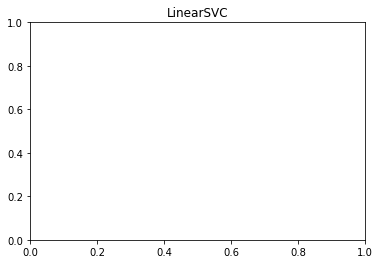

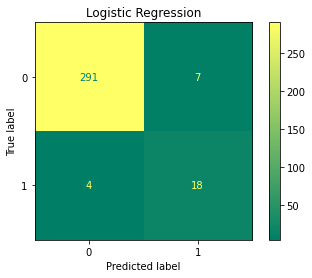

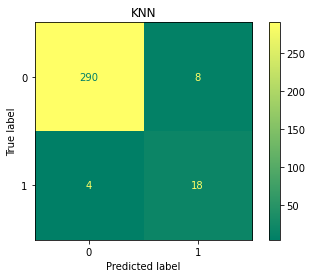

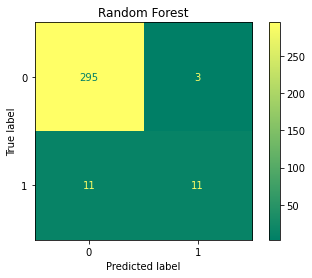

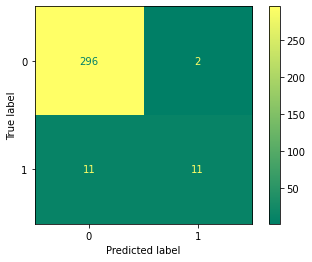

In [21]:
fit_and_score(models, X_train, X_test, y_train, y_test)

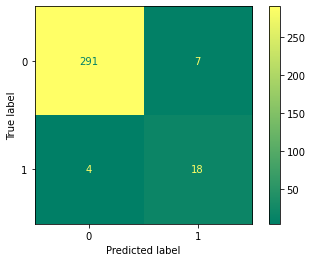

In [22]:
## confusion matrix for logistic regression
linear_svc = svm.SVC(kernel="linear", probability=True)
linear_svc.fit(X_train, y_train)
linear_svc.score(X_test, y_test)
y_preds = linear_svc.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="summer");

### ROC curve

In [23]:
# Make predictions with probabilities
y_probs = linear_svc.predict_proba(X_test)
y_probs_positive = y_probs[:,1]

In [24]:
# calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

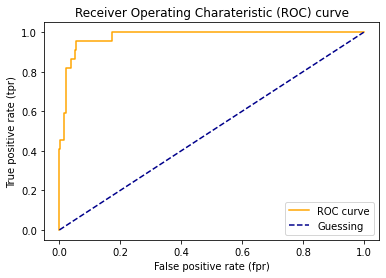

In [25]:
## Create a function to plotting ROC curves
def plot_roc_curve(fpr, tpr):
    """
        Plots a ROC curve given the false positive rate (fpr)
        and true positive rate (tpr) of a model.
    """
    
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC curve")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Charateristic (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [26]:
# Getting AUC score
roc_auc_score(y_test, y_probs_positive)

0.9792556436851738

We can improve the rate of true positives using the hyperparameter class_weight='balanced". However, we will increase the rate of false positives of the model. It will depend on what the customer chooses.

### Let's proceed with linearSVC
This model get good f1 and weighted avg scores (essential for unbalanced problems)

In [27]:
# Saving a model and load it
pickle.dump(linear_svc, open("linearSVC_shape.pk1", "wb"))

# Conclusion
We created a model with good performance, with low level of false negatives (18%) and false positives... also great f1 and weighted avg socores ( the weighted score is considered because we have a unbalanced problem and the f1 is good in this case too )

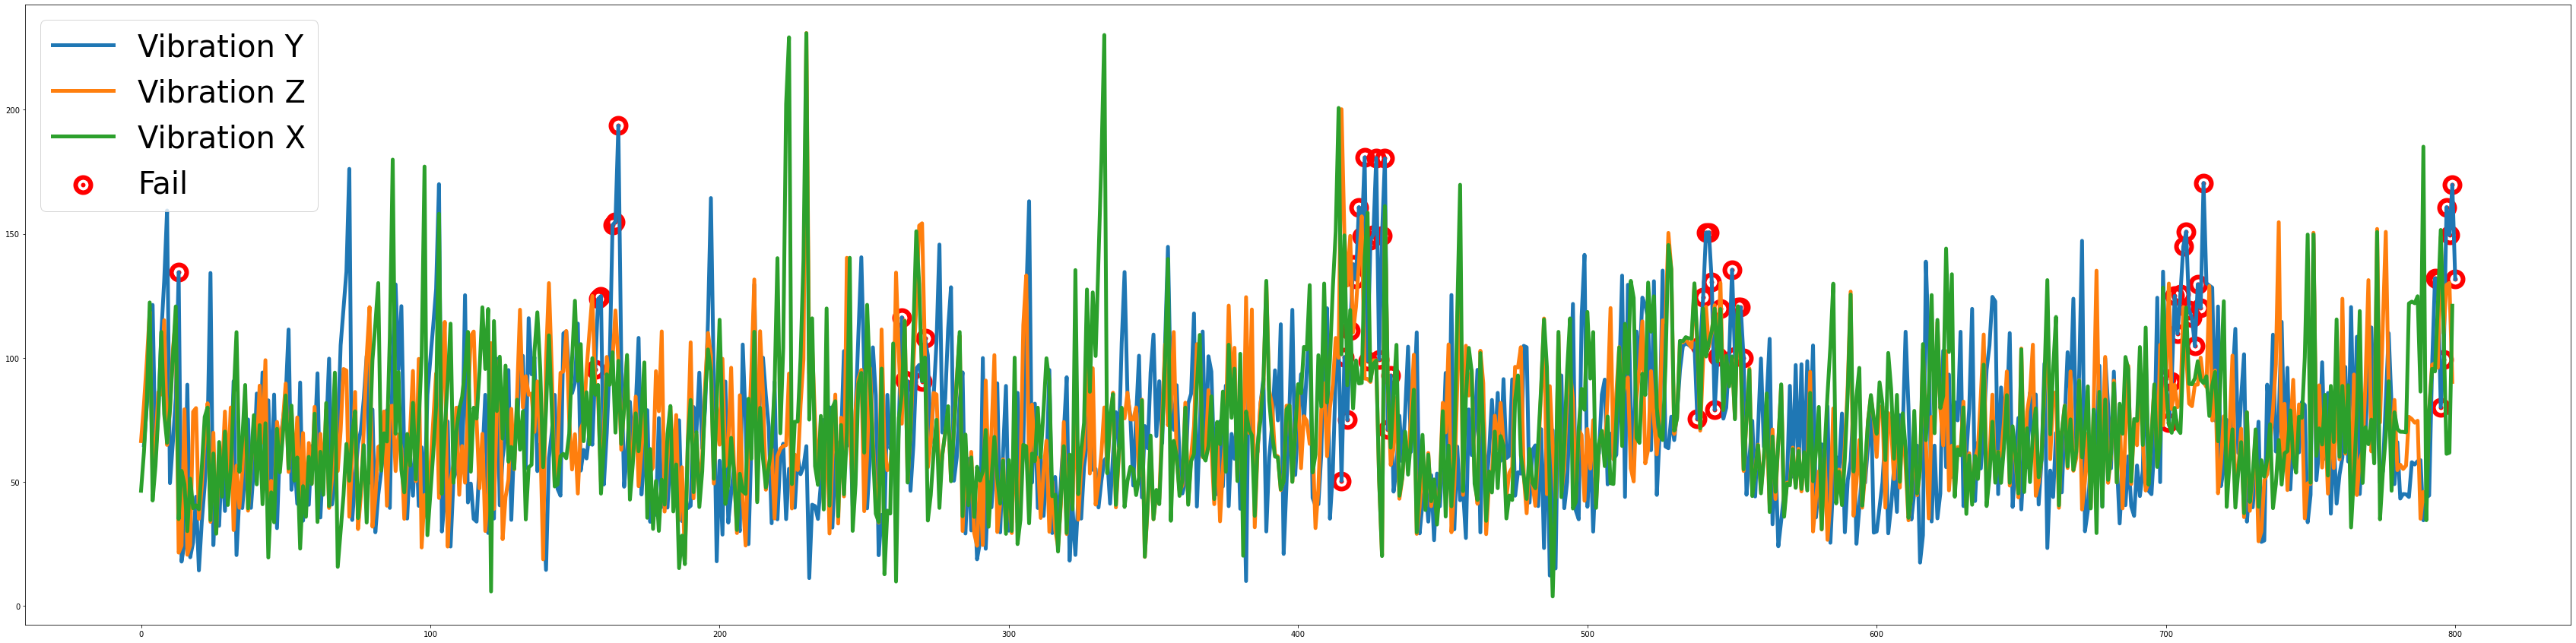

In [108]:
# plotting vibrations
plt.plot(df_filtered.Cycle, df_filtered.VibrationY, df_filtered.VibrationZ, linewidth=5);
plt.plot(df_filtered.VibrationX, linewidth=5);

# plotting fails
scatter = plt.scatter(x=df_filtered.Cycle[df_filtered.Fail ==True],
                        y=df_filtered.VibrationY[df_filtered.Fail ==True],
                        c="red", linewidths=20)

# customize graph
plt.legend(["Vibration Y", "Vibration Z", "Vibration X", "Fail"], fontsize=40)
plt.gcf().set_size_inches(60, 15)

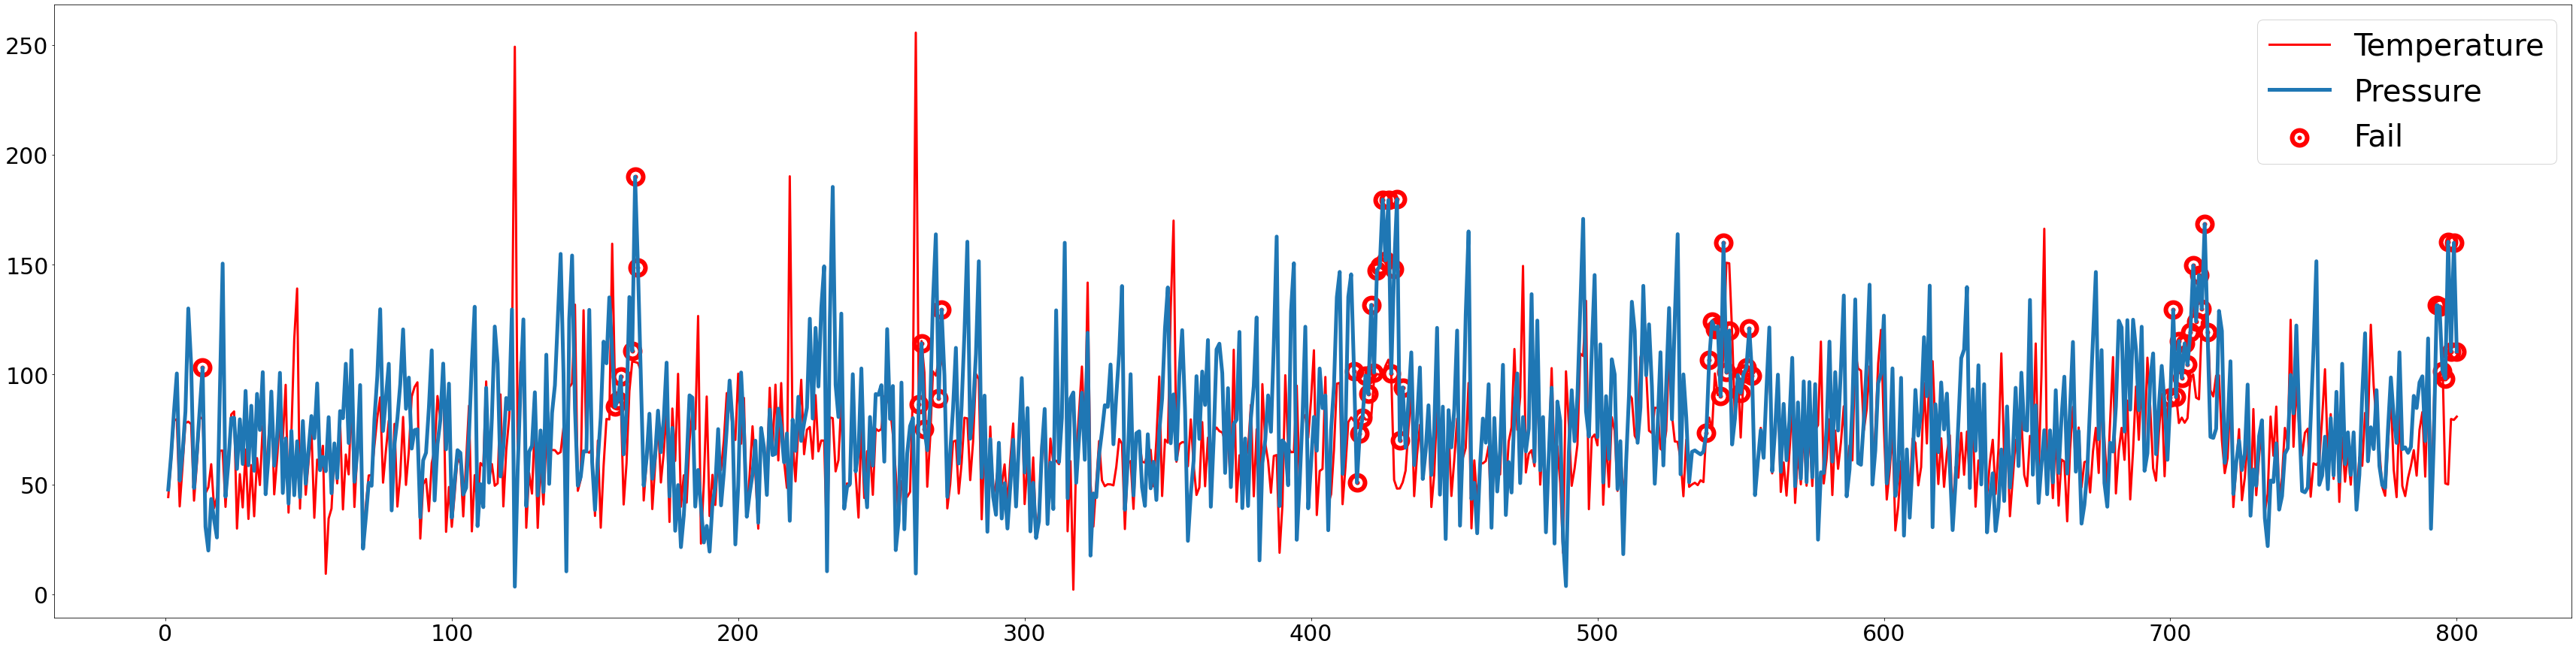

In [29]:
plt.plot(df_filtered.Cycle, df_filtered.Temperature,linewidth=3, color="red")
plt.plot(df_filtered.Cycle, df_filtered.Pressure,linewidth=5)
scatter = plt.scatter(x=df_filtered.Cycle[df_filtered.Fail ==True],
                        y=df_filtered.Pressure[df_filtered.Fail ==True],
                        c="red", linewidths=20)
plt.legend(["Temperature","Pressure", "Fail"], fontsize=40)
plt.tick_params(labelsize=30)
plt.gcf().set_size_inches(60, 15)

In this dataset we can note that the Vibration on Y axis has more influence on equipament failure. (according correlation matrix)
Temperature has good correlation with pressure... When pressure increases, temperature increases.
The graph of temperature and pressure, is possible see patterns between them.

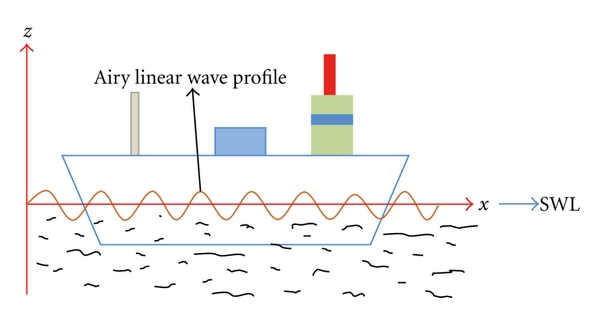

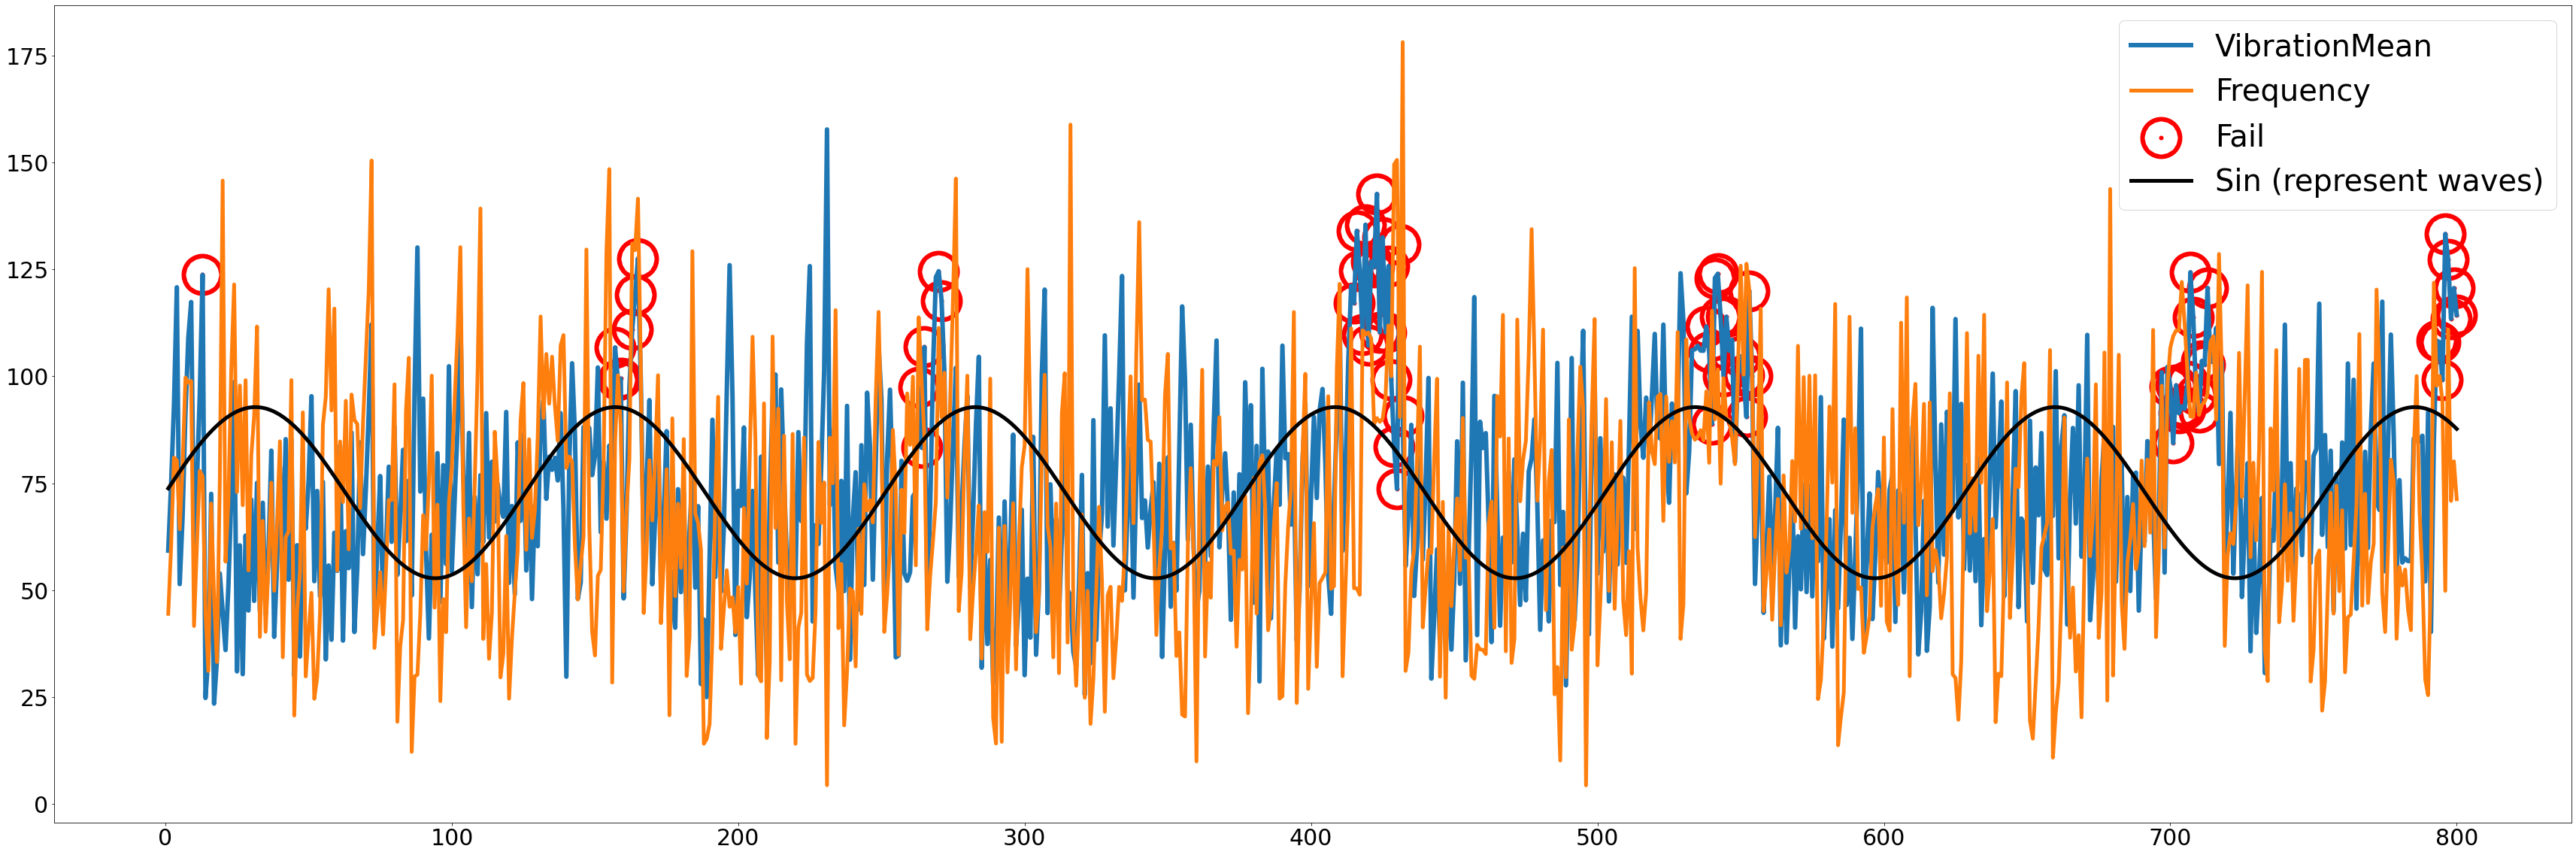

In [89]:
# creating a list that will receive the mean of vibrations
v_mean = []

# iterating our dataframe to include the mean frequency values within the list created earlier
for index, row in df_filtered.iterrows():
    row["VibrationMean"] = (row["VibrationY"] + row["VibrationX"] + row["VibrationZ"])/3
    v_mean.append(row["VibrationMean"])
df_filtered["VibrationMean"] = v_mean

# plot vibrationMean, frequency, fails (based on vibration mean) and the sin (represents the waves of the sea)
plt.plot(df_filtered.Cycle, df_filtered.VibrationMean,linewidth=6)
plt.plot(df_filtered.Cycle, df_filtered.Frequency,linewidth=5)
scatter = plt.scatter(x=df_filtered.Cycle[df_filtered.Fail ==True],
                        y=df_filtered.VibrationMean[df_filtered.Fail ==True],
                        c="red", linewidths=50)

amplitude = np.sin(df_filtered.Cycle/20)*20 +df_filtered.VibrationY.mean()
plt.plot(df_filtered.Cycle, amplitude, linewidth=5, linestyle='-', color='black')

plt.legend(["VibrationMean","Frequency","Fail","Sin (represent waves)"], fontsize=40)
plt.tick_params(labelsize=30)
plt.gcf().set_size_inches(60, 20)

# taking image to notebook
from IPython.display import Image
Image(filename='127238.fig.002a.jpg')

In the graph we can see a mean of all axis vibrations. It is possible to observe that when there is an increase in vibrations (local maximum) the probability of a failure increases.
I plot a sin of vibration mean as a graph, in this case I thinked in get some insights comparing the format of a wave with the vibration profile

We can note in the features graphs that there are similarities in the geometry. In practice, the physical events are causing the failures.
Perhaps, the waves that hit the fpso (or unexpected increase on pressure - consequently increase temperature too- .. wind(?)) generates high vibrations!